In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## DataFrame Set Up
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1XOaPeOztOsQpoTAdhh5ym_uFrpTGFebcmBeqBTwvQk8/edit#gid=833245260')
sheet = wb.worksheet('Form Responses 1')
df = pd.DataFrame(sheet.get_all_values())
df.rename(columns=df.iloc[0], inplace = True)
df.drop([0], inplace = True)

In [0]:
# cleaning the data frame#rename columns for simplicity 

df.rename(columns={'Your Zodiac': 'zodiac',
                   "Your Ex/Partner's Zodiac": "p_zodiac",
                   "Age Range": "age",
                   "Ex/Partner's Age Range": "p_age",
                   "Your Gender?": "gender",
                   "Your ex/partner's Gender?": "p_gender",
                   "On a scale from 1-10, how happy were/are you in your relationship?": "happy",
                   "On a scale from 1-10, how compatible did/do you feel you both are?": "compatible",
                   "Income": "income",
                   "Are you and your ex/partner the same ethnicity?": "ethnicity",
                   "Your highest level of education? (Or in progress)": "education",
                   "Your ex/partner's highest level of education? (Or in progress)": "p_education",
                   "Did/do you and your partner generally hold the same political views?": "political",
                   "Did/do you and your partner hold the same religious views?":"religion",
                   "Preferences (select for you and your ex/partner if yes) [Smoke?]": "smoke",
                   "Preferences (select for you and your ex/partner if yes) [Drink?]": "drink",
                   "Preferences (select for you and your ex/partner if yes) [Drug use?]": "drug",
                   "Preferences (select for you and your ex/partner if yes) [Premarital sex?]": "premarital_sex",
                   "Preferences (select for you and your ex/partner if yes) [Want to have kids?]": "kids",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Calm]": "calm",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Rational]": "rational",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Emotional ]": "emotional",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Stubborn]": "stubborn",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Adventurous]": "adventurous",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Creative]": "creative",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Analytical]": "analytical",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Introvert]": "introvert",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Extrovert]": "extrovert",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Like going out]": "going_out",
                   "Select whether each trait pertains to you, your ex/partner, or both of you. Leave blank if neither of you has that trait. [Like staying in ]": "staying_in",
                   "I am answering about:": "status"
    
                  }, inplace=True)
# remove timestamp column
# fill na with 0
df.fillna(0, inplace= True)

df.drop(columns=['Timestamp'], axis=0, inplace= True)
df.head()


,zodiac,p_zodiac,age,p_age,gender,p_gender,happy,compatible,income,ethnicity,education,p_education,political,religion,smoke,drink,drug,premarital_sex,kids,calm,rational,emotional,stubborn,adventurous,creative,analytical,introvert,extrovert,going_out,staying_in,status
1,Scorpio (October 23 - November 21),Pisces (February 19 - March 20),20-29,20-29,Female,Male,10,10,My ex/partner makes more than me,Yes,Bachelors,Bachelors,Yes,Yes,Your Partner,"You, Your Partner",Your Partner,"You, Your Partner","You, Your Partner",Your Partner,"You, Your Partner","You, Your Partner",You,"You, Your Partner","You, Your Partner","You, Your Partner",,"You, Your Partner","You, Your Partner",,My current partner
2,Cancer (June 21 - July 22),Virgo (August 23 - September 22),<20,20-29,Female,Male,9,10,My ex/partner makes more than me,Yes,Bachelors,Bachelors,Yes,Yes,,"You, Your Partner",Your Partner,"You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner",You,"You, Your Partner","You, Your Partner","You, Your Partner",My current partner
3,Scorpio (October 23 - November 21),Gemini (May 21 - June 20),20-29,20-29,Male,Female,3,5,I make more than my ex/partner,Yes,Bachelors,Bachelors,Yes,No,,"You, Your Partner","You, Your Partner","You, Your Partner",Your Partner,Your Partner,You,You,,You,,You,You,Your Partner,You,Your Partner,My current partner
4,Capricorn (December 22 - January 19),Aries (March 21 - April 19),20-29,20-29,Female,Male,10,8,My ex/partner makes more than me,Yes,Bachelors,Bachelors,No,Yes,,"You, Your Partner",,"You, Your Partner","You, Your Partner",,"You, Your Partner",You,"You, Your Partner","You, Your Partner",You,Your Partner,You,Your Partner,"You, Your Partner","You, Your Partner",My current partner
5,Cancer (June 21 - July 22),Sagittarius (November 22 - December 21),20-29,20-29,Female,Male,10,10,Neither of us have income,Yes,PhD,PhD,Yes,No,,"You, Your Partner",,"You, Your Partner","You, Your Partner","You, Your Partner","You, Your Partner",You,"You, Your Partner",Your Partner,,"You, Your Partner",,"You, Your Partner",,"You, Your Partner",My current partner


In [0]:
## transforming categorical variables

# BACKGROUND
df['age'].replace(to_replace= {'<20': 0, '20-29': 1, "30-49": 2, "30-50": 2, "50+":3}, inplace= True)
df['p_age'].replace(to_replace= {'<20': 0, '20-29': 1, "30-49": 2, "30-50": 2, "50+":3}, inplace= True)


df['gender'].replace(to_replace= {'Female':0, 'Male':1}, inplace= True)
df['p_gender'].replace(to_replace={'Female':0, 'Male':1}, inplace= True)
df['income'].replace(to_replace={'Neither of us have income': 0,
                                'My ex/partner has no income': 1,
                                'I have no income': 2,
                                'I make the same as my ex/partner': 3,
                                'My ex/partner makes more than me': 4,
                                'I make more than my ex/partner': 5}, inplace = True)

df['ethnicity'].replace(to_replace={'Yes':1, 'No':0}, inplace= True)


df['education'].replace(to_replace={'None':0, 
                                    'High School':1,
                                    'Associates': 2, 
                                   'Bachelors': 3,
                                   'Masters': 4,
                                   'PhD': 5,
                                   'Other professional degree': 6}, inplace= True)

df['p_education'].replace(to_replace={'None':0, 
                                    'High School':1,
                                    'Associates': 2, 
                                   'Bachelors': 3,
                                   'Masters': 4,
                                   'PhD': 5,
                                   'Other professional degree': 6}, inplace= True)

df['political'].replace(to_replace={'Yes':1, 'No':0, 'Maybe':2}, inplace= True)

# PREFERENCES & TRAITS

# ideally change to a matrix of 0,1 
pref_r = {'You, Your Partner': 1, 
          'You': 2,
        'Your Partner': 3}
                            
df['smoke'].replace(to_replace=pref_r, inplace= True)
df['drink'].replace(to_replace=pref_r, inplace= True)
df['drug'].replace(to_replace=pref_r, inplace= True)
df['premarital_sex'].replace(to_replace=pref_r, inplace= True)
df['kids'].replace(to_replace=pref_r, inplace= True)

df['calm'].replace(to_replace=pref_r, inplace= True)
df['rational'].replace(to_replace=pref_r, inplace= True)
df['emotional'].replace(to_replace=pref_r, inplace= True)
df['stubborn'].replace(to_replace=pref_r, inplace= True)
df['adventurous'].replace(to_replace=pref_r, inplace= True)
df['creative'].replace(to_replace=pref_r, inplace= True)
df['analytical'].replace(to_replace=pref_r, inplace= True)
df['introvert'].replace(to_replace=pref_r, inplace= True)
df['extrovert'].replace(to_replace=pref_r, inplace= True)
df['going_out'].replace(to_replace=pref_r, inplace= True)
df['staying_in'].replace(to_replace=pref_r, inplace= True)



In [0]:
## expanded dataframe

df_new = df.copy()

# smoke
psmoke = []
smoke = []
for i in df_new['smoke']:
    if (i == 0): # neither have it
        smoke.append(0)
        psmoke.append(0)
    elif (i == 1): # both have it
        smoke.append(1)
        psmoke.append(1)
    elif (i == 2): # only you
        smoke.append(1)
        psmoke.append(0)
    else: #only partner
        smoke.append(0)
        psmoke.append(1)

df_new['p_smoke'] = psmoke
df_new['smoke'] = smoke


# drink
pdrink = []
drink = []
for i in df_new['drink']:
    if (i == 0): # neither have it
        drink.append(0)
        pdrink.append(0)
    elif (i == 1): # both have it
        drink.append(1)
        pdrink.append(1)
    elif (i == 2): # only you
        drink.append(1)
        pdrink.append(0)
    else: #only partner
        drink.append(0)
        pdrink.append(1)

df_new['p_drink'] = pdrink
df_new['drink'] = drink

# drug
pdrug = []
drug = []
for i in df_new['drug']:
    if (i == 0): # neither have it
        drug.append(0)
        pdrug.append(0)
    elif (i == 1): # both have it
        drug.append(1)
        pdrug.append(1)
    elif (i == 2): # only you
        drug.append(1)
        pdrug.append(0)
    else: #only partner
        drug.append(0)
        pdrug.append(1)

df_new['p_drug'] = pdrug
df_new['drug'] = drug


# premarital sex

psex = []
sex = []
for i in df_new['premarital_sex']:
    if (i == 0): # neither have it
        sex.append(0)
        psex.append(0)
    elif (i == 1): # both have it
        sex.append(1)
        psex.append(1)
    elif (i == 2): # only you
        sex.append(1)
        psex.append(0)
    else: #only partner
        sex.append(0)
        psex.append(1)

df_new['p_sex'] = psex
df_new['premarital_sex'] = sex

# kids
pkids = []
kids = []
for i in df_new['kids']:
    if (i == 0): # neither have it
        kids.append(0)
        pkids.append(0)
    elif (i == 1): # both have it
        kids.append(1)
        pkids.append(1)
    elif (i == 2): # only you
        kids.append(1)
        pkids.append(0)
    else: #only partner
        kids.append(0)
        pkids.append(1)

df_new['p_kids'] = pkids
df_new['kids'] = kids



#calm
pcalm = []
calm = []
for i in df_new['calm']:
    if (i == 0): # neither have it
        calm.append(0)
        pcalm.append(0)
    elif (i == 1): # both have it
        calm.append(1)
        pcalm.append(1)
    elif (i == 2): # only you
        calm.append(1)
        pcalm.append(0)
    else: #only partner
        calm.append(0)
        pcalm.append(1)

df_new['p_calm'] = pcalm
df_new['calm'] = calm

#rataional

prat = []
rat = []
for i in df_new['rational']:
    if (i == 0): # neither have it
        rat.append(0)
        prat.append(0)
    elif (i == 1): # both have it
        rat.append(1)
        prat.append(1)
    elif (i == 2): # only you
        rat.append(1)
        prat.append(0)
    else: #only partner
        rat.append(0)
        prat.append(1)

df_new['p_rat'] = prat
df_new['rational'] = rat

#emotional

pemo = []
emo = []
for i in df_new['emotional']:
    if (i == 0): # neither have it
        emo.append(0)
        pemo.append(0)
    elif (i == 1): # both have it
        emo.append(1)
        pemo.append(1)
    elif (i == 2): # only you
        emo.append(1)
        pemo.append(0)
    else: #only partner
        emo.append(0)
        pemo.append(1)

df_new['p_emo'] = prat
df_new['emotional'] = rat
#stubborn

pstubborn = []
stubborn = []
for i in df_new['stubborn']:
    if (i == 0): # neither have it
        stubborn.append(0)
        pstubborn.append(0)
    elif (i == 1): # both have it
        stubborn.append(1)
        pstubborn.append(1)
    elif (i == 2): # only you
        stubborn.append(1)
        pstubborn.append(0)
    else: #only partner
        stubborn.append(0)
        pstubborn.append(1)

df_new['p_stubborn'] = pstubborn
df_new['stubborn'] = stubborn

#adventurous

padv = []
adv = []
for i in df_new['adventurous']:
    if (i == 0): # neither have it
        adv.append(0)
        padv.append(0)
    elif (i == 1): # both have it
        adv.append(1)
        padv.append(1)
    elif (i == 2): # only you
        adv.append(1)
        padv.append(0)
    else: #only partner
        adv.append(0)
        padv.append(1)

df_new['p_adventurous'] = padv
df_new['adventurous'] = adv

#creative
pcreate = []
create = []
for i in df_new['creative']:
    if (i == 0): # neither have it
        create.append(0)
        pcreate.append(0)
    elif (i == 1): # both have it
        create.append(1)
        pcreate.append(1)
    elif (i == 2): # only you
        create.append(1)
        pcreate.append(0)
    else: #only partner
        create.append(0)
        pcreate.append(1)

df_new['p_creative'] = create
df_new['creative'] = pcreate


#analytical

panal = []
anal = []
for i in df_new['analytical']:
    if (i == 0): # neither have it
        anal.append(0)
        panal.append(0)
    elif (i == 1): # both have it
        anal.append(1)
        panal.append(1)
    elif (i == 2): # only you
        anal.append(1)
        panal.append(0)
    else: #only partner
        anal.append(0)
        panal.append(1)

df_new['p_analytical'] = panal
df_new['analytical'] = anal

#introvert

pintro = []
intro = []
for i in df_new['introvert']:
    if (i == 0): # neither have it
        intro.append(0)
        pintro.append(0)
    elif (i == 1): # both have it
        intro.append(1)
        pintro.append(1)
    elif (i == 2): # only you
        intro.append(1)
        pintro.append(0)
    else: #only partner
        intro.append(0)
        pintro.append(1)

df_new['p_introvert'] = pintro
df_new['introvert'] = intro

#extrovert

pentro = []
extro = []
for i in df_new['extrovert']:
    if (i == 0): # neither have it
        extro.append(0)
        pentro.append(0)
    elif (i == 1): # both have it
        extro.append(1)
        pentro.append(1)
    elif (i == 2): # only you
        extro.append(1)
        pentro.append(0)
    else: #only partner
        extro.append(0)
        pentro.append(1)

df_new['p_extrovert'] = pentro
df_new['extrovert'] = extro

#going out

pgo = []
go = []
for i in df_new['going_out']:
    if (i == 0): # neither have it
        go.append(0)
        pgo.append(0)
    elif (i == 1): # both have it
        go.append(1)
        pgo.append(1)
    elif (i == 2): # only you
        go.append(1)
        pgo.append(0)
    else: #only partner
        go.append(0)
        pgo.append(1)

df_new['p_going_out'] = pgo
df_new['going_out'] = go

#staying in
psi= []
si = []
for i in df_new['staying_in']:
    if (i == 0): # neither have it
        si.append(0)
        psi.append(0)
    elif (i == 1): # both have it
        si.append(1)
        psi.append(1)
    elif (i == 2): # only you
        si.append(1)
        psi.append(0)
    else: #only partner
        si.append(0)
        psi.append(1)

df_new['p_staying_in'] = psi
df_new['staying_in'] = si


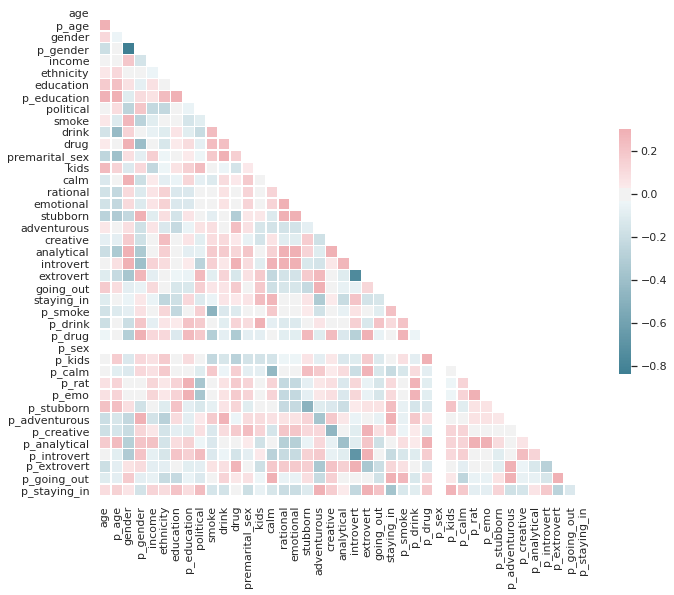

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_new.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
            

**Heat Map Analysis:**
- Generally, there is an positive/neutral correlation in substance use and views on kids between respondent and partner.
- Most respondents are hetereosexual partners with similar income as their partners
- There seems to be positive correlation between certain features (for example: extrovert & adventurous)
- There is also opposite trends in respondent versus partner traits - if a partner enjoys staying in, there is negative correlation that the respondent does not.



In [0]:
df.groupby(["income"]).count()


,zodiac,p_zodiac,age,p_age,gender,p_gender,happy,compatible,ethnicity,education,p_education,political,religion,smoke,drink,drug,premarital_sex,kids,calm,rational,emotional,stubborn,adventurous,creative,analytical,introvert,extrovert,going_out,staying_in,status
income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
5,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


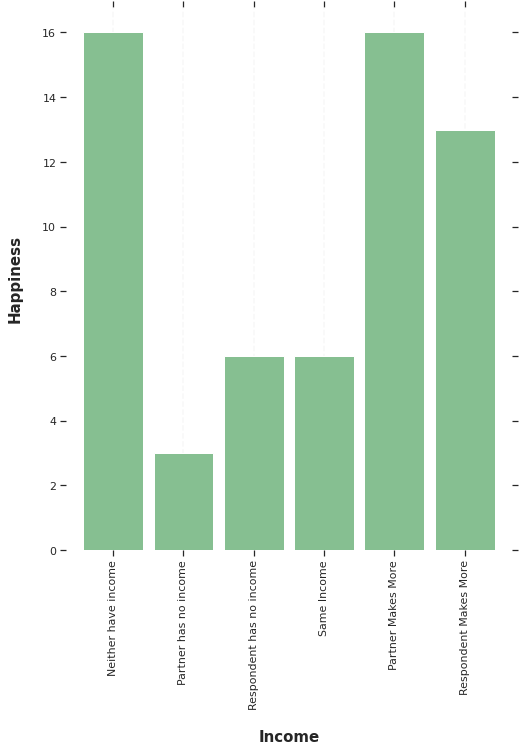

In [0]:
import matplotlib.pyplot as plt

x = df.groupby('income')['happy'].count()

ax = x.plot(kind='bar', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
positions = (0,1,2,3,4,5)
labels = ("Neither have income", "Partner has no income", "Respondent has no income", "Same Income", "Partner Makes More", "Respondent Makes More")
plt.xticks(positions, labels)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")


vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


ax.set_xlabel("Income", labelpad=20, weight='bold', size=15)
ax.set_ylabel("Happiness", labelpad=20, weight='bold', size=15);



**Analysis:**
According to the plot, the most happiness levels are from those with either no income or when one partner makes more than the other. If the have the same income or one does not have an income, the happiness level is the same. While this seemed oddly divergent, our dataset is a predominantely students (who have no income) and parents/family friends (where it's common for one spouse to make more than the other). Regardless, income has confounding variables such as age and gender that render the variable to not be so useful in our model.

## Correlation of Top Features

In [0]:
df.groupby(["zodiac"]).count().sort_values(by = ["p_zodiac"],ascending = False)['p_zodiac']

zodiac
Virgo (August 23 - September 22)           10
Cancer (June 21 - July 22)                  8
Scorpio (October 23 - November 21)          7
Taurus (April 20 - May 20)                  7
Aries (March 21 - April 19)                 6
Sagittarius (November 22 - December 21)     5
Aquarius (January 20 - February 18)         4
Capricorn (December 22 - January 19)        3
Gemini (May 21 - June 20)                   3
Leo (July 23 - August 22)                   3
Pisces (February 19 - March 20)             3
Libra (September 23 - October 22)           1
Name: p_zodiac, dtype: int64

In [0]:
cor = df_new.corr()
#Correlation with output variable
cor_target = abs(cor['p_calm'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

calm           0.447214
stubborn       0.234404
extrovert      0.281963
staying_in     0.210580
p_calm         1.000000
p_going_out    0.246718
Name: p_calm, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor['adventurous'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

education        0.218031
drug             0.227508
adventurous      1.000000
extrovert        0.254658
going_out        0.403961
staying_in       0.323386
p_adventurous    0.361158
p_extrovert      0.346877
p_going_out      0.211180
p_staying_in     0.320037
Name: adventurous, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor['staying_in'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

ethnicity        0.243865
kids             0.240663
calm             0.269069
adventurous      0.323386
analytical       0.205505
introvert        0.205505
staying_in       1.000000
p_smoke          0.223100
p_calm           0.210580
p_stubborn       0.234863
p_adventurous    0.381652
p_introvert      0.210580
p_going_out      0.392304
p_staying_in     0.367353
Name: staying_in, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor['going_out'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

stubborn        0.221249
adventurous     0.403961
going_out       1.000000
p_drink         0.207514
p_staying_in    0.211100
Name: going_out, dtype: float64

In [0]:
#Correlation with output variable
cor_target = abs(cor['going_out'] - cor['p_staying_in'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

education         0.347064
p_education       0.220908
smoke             0.205954
drink             0.223902
premarital_sex    0.214835
kids              0.251398
extrovert         0.201225
going_out         0.788900
staying_in        0.225380
p_drink           0.303888
p_drug            0.238007
p_kids            0.393102
p_calm            0.322707
p_creative        0.238679
p_analytical      0.245148
p_staying_in      0.788900
dtype: float64

**Correlation of Top Features Analysis:** Understanding relationships between these features helps us create mental clusters of personality traits. We can also see whether opposites attract or partners synchronize for different traits. Lastly, we also see preferences that have no bearing on other personality traits — for example, if you are "extroverted", you enjoy "adventure" and probably "drink" but the reverse is not always true. There are introverts who prefer to stay in, but also drink. In this case, the feature "drink" has no impact on personality traits. This confirms and narrows a lot of the high level correlation we saw with the heat map.

In [0]:
zod_df = df.groupby(['zodiac', 'p_zodiac'])["happy"].agg(["max", "min"])
zod_df

max min
zodiac                                  p_zodiac                                       
Aquarius (January 20 - February 18)     Aries (March 21 - April 19)               8   8
                                        Sagittarius (November 22 - December 21)   7   7
                                        Scorpio (October 23 - November 21)       10  10
Aries (March 21 - April 19)             Aquarius (January 20 - February 18)       8   8
                                        Aries (March 21 - April 19)               8   8
                                        Capricorn (December 22 - January 19)     10  10
                                        Gemini (May 21 - June 20)                10  10
                                        Sagittarius (November 22 - December 21)   7   7
Cancer (June 21 - July 22)              Aquarius (January 20 - February 18)       9  10
                                        Aries (March 21 - April 19)               9   7
                                        Sagittarius (November 22 - December 21)  10  10
                                        Scorpio (October 23 - November 21)        7   7
                                        Virgo (August 23 - September 22)          9   7
Capricorn (December 22 - January 19)    Aquarius (January 20 - February 18)       8   8
                                        Aries (March 21 - April 19)              10  10
                                        Virgo (August 23 - September 22)          9   9
Gemini (May 21 - June 20)               Leo (July 23 - August 22)                 5   3
                                        Taurus (April 20 - May 20)                9   9
Leo (July 23 - August 22)               Leo (July 23 - August 22)                 9   9
                                        Scorpio (October 23 - November 21)        1   1
                                        Taurus (April 20 - May 20)                4   4
Libra (September 23 - October 22)       Sagittarius (November 22 - December 21)  10  10
Pisces (February 19 - March 20)         Aries (March 21 - April 19)               8   8
                                        Cancer (June 21 - July 22)                7   7
                                        Sagittarius (November 22 - December 21)   8   8
Sagittarius (November 22 - December 21) Aries (March 21 - April 19)               9   9
                                        Capricorn (December 22 - January 19)      8   8
                                        Gemini (May 21 - June 20)                 7   7
                                        Leo (July 23 - August 22)                 5   5
                                        Pisces (February 19 - March 20)           9   9
Scorpio (October 23 - November 21)      Aquarius (January 20 - February 18)       9  10
                                        Gemini (May 21 - June 20)                 3   3
                                        Leo (July 23 - August 22)                 7   7
                                        Libra (September 23 - October 22)         5   5
                                        Pisces (February 19 - March 20)           7  10
Taurus (April 20 - May 20)              Aries (March 21 - April 19)               7   7
                                        Capricorn (December 22 - January 19)     10  10
                                        Gemini (May 21 - June 20)                10  10
                                        Leo (July 23 - August 22)                 8   8
                                        Libra (September 23 - October 22)         7  10
                                        Virgo (August 23 - September 22)          9   9
Virgo (August 23 - September 22)        Cancer (June 21 - July 22)                8   8
                                        Capricorn (December 22 - January 19)      9   9
                                        Gemini (May 21 - June 20)                 8   8
                                

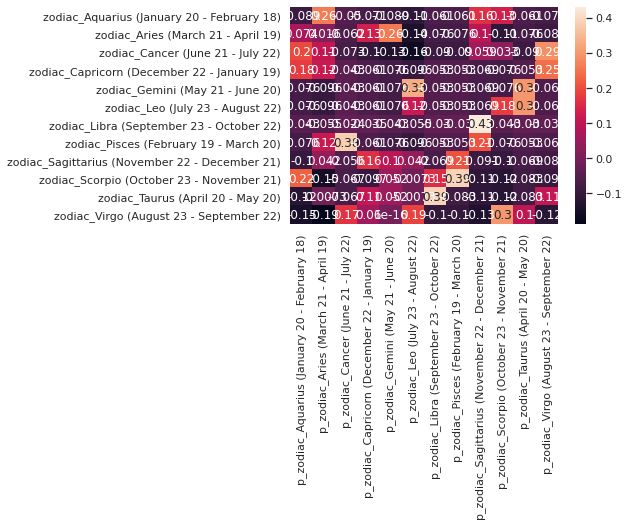

In [0]:
zods = df.iloc[:,0:2]
zods = pd.get_dummies(zods)
z_corr = zods.corr().iloc[:12, 12:]
sns.heatmap(z_corr, annot=True)
plt.show()